In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
path = os.path.join(os.path.dirname('.'), 'data')
sku = pd.read_csv(os.path.join(path, 'sku_dict.csv'), parse_dates=['creation_date', 'expiration_date'])
sku


,sku_id,fincode,ui1_code,ui2_code,ui3_code,vendor,brand_code,creation_date,expiration_date
0,43207,A1,A10,A1000,A1000001,A10001,A1000001,2018-01-01,2200-01-01
1,87209,UA,UA1,UA100,UA10000,BLW9FG,484JDFU5,2019-09-05,2200-01-01
2,33513,G9,G91,G9100,G910003,7I77VL,MMC2P4Y3,2018-07-21,2200-01-01
3,47505,AQ,AQ1,AQ100,AQ10000,4HJSP5,8FYENEWM,2018-03-26,2200-01-01
4,53350,6L,6L1,6L100,6L10005,JSOSD5,YTE7JS4H,2018-11-30,2200-01-01
...,...,...,...,...,...,...,...,...,...
9995,90248,B0,B01,B0100,B010000,AWD3XQ,4P277OU8,2019-10-24,2200-01-01
9996,89418,SI,SI1,SI100,SI10000,2CI2A8,8FYENEWM,2019-07-28,2200-01-01
9997,54920,GY,GY1,GY102,GY10200,4HJSP5,3P2I0S6S,2018-01-22,2200-01-01
9998,41483,70,701,70100,7010003,2CI2A8,MMC2P4Y3,2019-03-23,2019-06-15


In [3]:
first_gr = pd.read_csv(os.path.join(path, 'first_group_sku.csv'), parse_dates=['dates'])
first_gr

,dates,SKU,price_per_sku,num_purchases
0,2018-04-20,32950,422.975,3
1,2018-04-24,32950,429.275,3
2,2018-04-27,32950,435.100,3
3,2018-04-30,32950,NaN,1
4,2018-05-03,32950,440.950,2
...,...,...,...,...
240,2019-11-25,78833,NaN,1
241,2019-11-27,78833,301.560,2
242,2019-11-28,78833,301.305,2
243,2019-11-29,78833,301.920,1


In [4]:
first_gr.pivot_table(index='SKU', values='price_per_sku', aggfunc=['min', 'max'])

,min,max
,price_per_sku,price_per_sku
SKU,,
32950,422.975,486.325
78833,295.830,324.450


In [5]:
grps = ['first_group_sku', 'second_group_sku', 'third_group_sku']
uvb = pd.DataFrame(columns=['vendor', 'brand_code', 'file'])
mm = pd.DataFrame()
for gr in grps:
    df = pd.read_csv(os.path.join(path, gr + '.csv'), parse_dates=['dates'])
    temp_mm = df.pivot_table(index='SKU', values='price_per_sku', aggfunc=['min', 'max'])
    mm = pd.concat([mm, temp_mm])
    sku_merge = sku.merge(df.rename(dict(SKU='sku_id'), axis=1), how='inner', on='sku_id')
    temp = sku_merge.groupby(['vendor'], as_index=False)['brand_code'].count()
    temp['file'] = gr
    uvb = pd.concat([uvb, temp], ignore_index=True)
uvb.rename(columns={'vendor': 'vendor_unique_number', 'brand_code': 'brand_unique_number'}, inplace=True)
# uvb.to_csv(os.path.join(path, 'unique_vendor_brand.csv'), index=False)
mm = mm.reset_index()
mm.columns = [f'{s[0]}_price' if s[0] != 'SKU' else s[0] for s in mm.columns]

In [6]:
uvb

,vendor_unique_number,brand_unique_number,file
0,AO59EQ,149,first_group_sku
1,UH2WWF,96,first_group_sku
2,4HJSP5,917,second_group_sku
3,4O4WSH,565,second_group_sku
4,AWD3XQ,491,second_group_sku
5,BLW9FG,91,second_group_sku
6,FI3ASO,462,second_group_sku
7,LDLJFP,56,second_group_sku
8,SHL570,525,second_group_sku
9,TJYT3A,102,second_group_sku


In [7]:
mm

,SKU,min_price,max_price
0,32950,422.9750,486.325
1,78833,295.8300,324.450
2,10334,79.1504,102.781
3,17812,61.0640,78.192
4,36096,120.6720,135.312
5,38767,62.9118,75.852
6,43678,116.5312,151.474
7,57561,77.9744,101.829
8,64619,142.8534,153.704
9,68211,147.7683,166.056


In [8]:
### 2 
# Постройте зависимость цены (price_per_sku) от времени (dates) для каждого SKU. 
# Результатом должен быть график с соответствующими данными по осям по SKU.
fg = first_gr.copy()
# fg['dates'] = pd.to_datetime(fg.dates)
# fg.set_index('dates', inplace=True)

In [9]:
import matplotlib as mpl

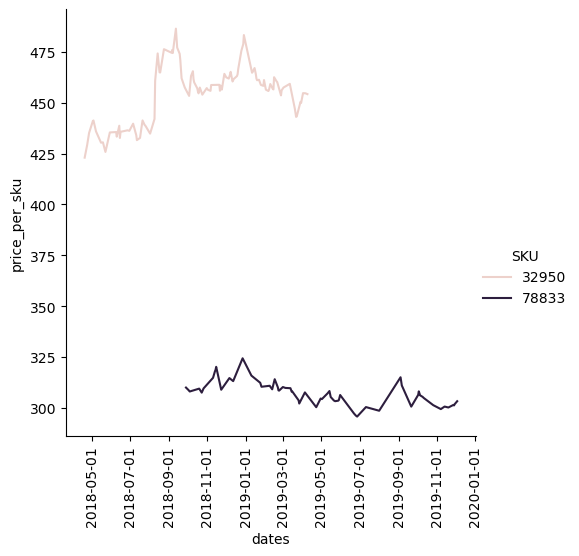

In [10]:
mpl.rcParams['figure.figsize'] = (10, 5)
g = sns.relplot(data=fg, x='dates', y='price_per_sku', hue='SKU', kind='line')
g.set_xticklabels(rotation=90);

In [11]:
fg.SKU.value_counts(dropna=False)

SKU
32950    149
78833     96
Name: count, dtype: int64

In [12]:
# Посчитайте количество пропусков в столбце цен (price_per_sku) для каждого SKU.
# Сохраните результат в файл first_sku_price_missings.csv с колонками 'SKU', 'nulls_count'.
fg.SKU.value_counts() - fg.groupby('SKU')['price_per_sku'].count()

SKU
32950    44
78833    32
dtype: int64

In [15]:
fg = first_gr.copy()
fg['price_impute'] = fg.price_per_sku.interpolate(method='linear')

In [16]:
fg

,dates,SKU,price_per_sku,num_purchases,price_impute
0,2018-04-20,32950,422.975,3,422.9750
1,2018-04-24,32950,429.275,3,429.2750
2,2018-04-27,32950,435.100,3,435.1000
3,2018-04-30,32950,NaN,1,438.0250
4,2018-05-03,32950,440.950,2,440.9500
...,...,...,...,...,...
240,2019-11-25,78833,NaN,1,300.9225
241,2019-11-27,78833,301.560,2,301.5600
242,2019-11-28,78833,301.305,2,301.3050
243,2019-11-29,78833,301.920,1,301.9200


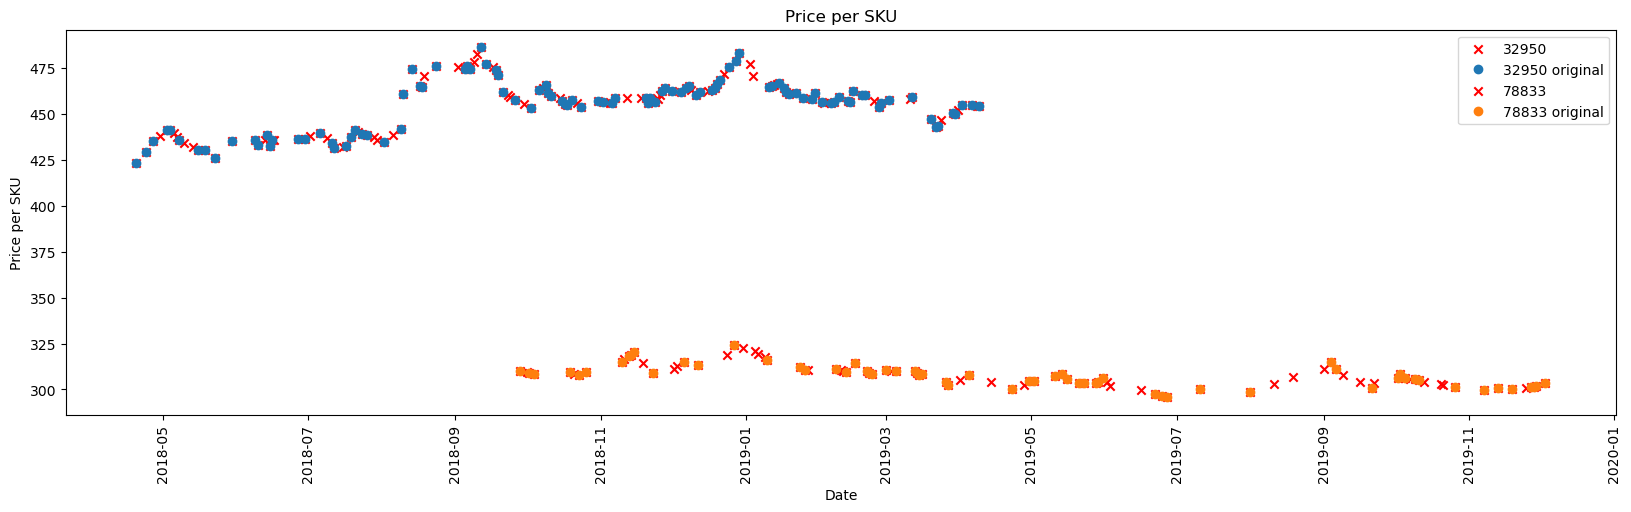

In [26]:
fig, axs = plt.subplots(figsize=(20,5))
for sku_id, group in fg.groupby('SKU'):
    axs.scatter(group.dates, group.price_impute, label=sku_id, marker='x', c='red')
    axs.plot(group.dates, group.price_per_sku, 'o', label=f'{sku_id} original')
axs.legend()
axs.set_title('Price per SKU')
axs.set_xlabel('Date')
axs.set_ylabel('Price per SKU')
plt.xticks(rotation=90)
plt.show()

In [34]:
fg['price_pct_change'] = fg.groupby('SKU')['price_impute'].pct_change() * 100
fg['quantity_pct_change'] = fg.groupby('SKU')['num_purchases'].pct_change() * 100
fg['elasticity'] = fg['price_pct_change'] / fg['quantity_pct_change']
fg['elasticity'] = fg['elasticity'].replace([np.inf, -np.inf], np.nan)

<Axes: xlabel='num_purchases', ylabel='price_impute'>

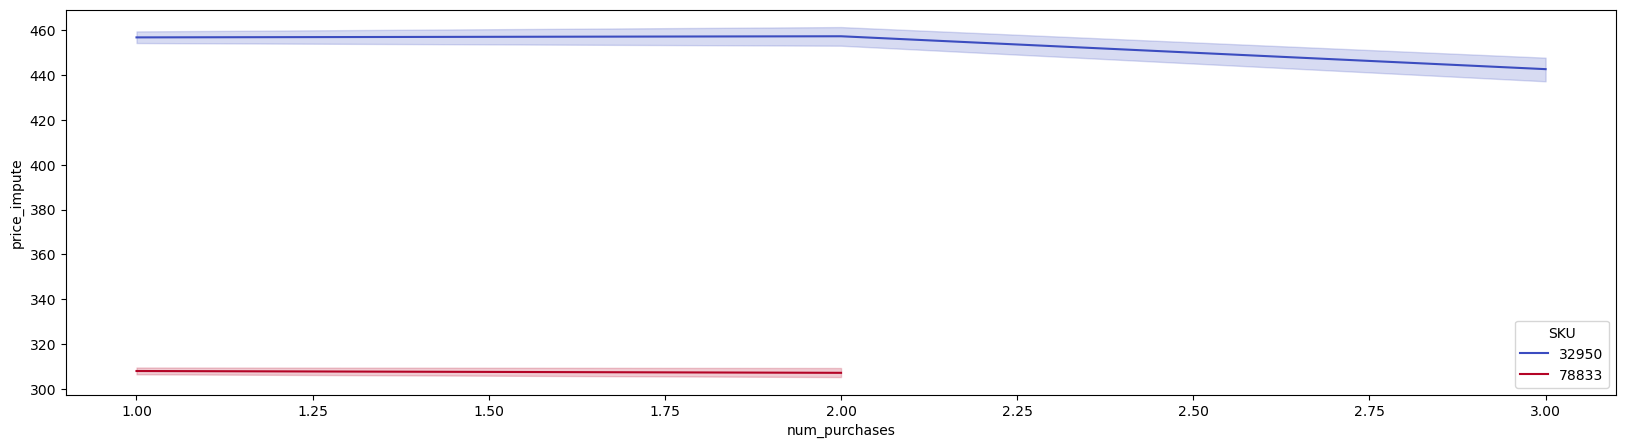

In [ ]:
fig, axs = plt.subplots(figsize=(20,5))
sns.lineplot(x='num_purchases', y='price_impute', data=fg, hue='SKU', palette='coolwarm')